<a href="https://colab.research.google.com/github/SoundaryaSarathi/MLCodes/blob/main/neural_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #inmplementing the XOR function
import numpy as np

In [ ]:
#Activation functions
def tanh(x):
  return np.tanh(x)

def d_tanh(x):
  return 1-(np.square((np.tanh(x))))

def sigmoid(x):
  return 1/(1+np.exp(-x))

def d_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

# Loss Functions 
def logloss(y, a):
    #print('loss',y*np.log(a),(1-y)*np.log(1-a))
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

    #in above a,y are vectors and a*(1-a) is a scalar





activations is a dictionary the provides a mapping between the input activation with the actual activation function and its derivative defined above.

The feedforward does the following:




In [ ]:
class Layer:

  activations={
      'tanh':(tanh,d_tanh),
      'sigmoid':(sigmoid,d_sigmoid)
  }

  learning_rate=0.1

  def __init__(self,inputs,neurons,activation):
    self.weights=np.random.rand(neurons,inputs)
    self.bias=np.zeros((neurons,1))
    self.act,self.deract=self.activations.get(activation)
    #print(self.weights)

  def feedforward(self,A_prev):
    self.A_prev=A_prev #We store this because in backpropagation we use it
    self.z=np.dot(self.weights,self.A_prev)+self.bias
    self.A=self.act(self.z)
    return self.A
    
  def backprop(self,dA):
    dz=self.deract(self.z)*dA
    dw=(1/dz.shape[1])*np.dot(dz,self.A_prev.T) #this sums up all the values in all the samples so to get the average, we divide  by the number of samples
    db=(1/dz.shape[1])*np.sum(dz, axis=1, keepdims=True)
    dA_prev=np.dot(self.weights.T,dz)
    
    #updation
    self.weights=self.weights-self.learning_rate*dw
    self.bias=self.learning_rate*db
    return dA_prev

layer has two attributes:

(i)number of inputs to each neuron

(ii) number of neurons in the layer 

(iii)the activation function of that layer


In the below code, layers is a list containing the differnt layers

$$ dz=\frac{∂C}{∂Z}$$
$$ dW=\frac{∂C}{∂W}$$
$$ db=\frac{∂C}{∂b}$$
$$ dA=\frac{∂C}{∂A^l}$$
$$ dA_prev=\frac{∂C}{∂A^{l-1}}$$


In [ ]:
x_train=np.array([[0,0,1,1],[0,1,0,1]])
y_train=np.array([[0,1,1,0]])

m=4 #number of samples
epochs=5000


layers=[Layer(2,3,'sigmoid'),Layer(3,1,'sigmoid')]
cost_list=[] #is the cost value at each epoch

#starting the iterations with range number of epochs
for epoch in range(epochs):
  A=x_train
  #forward propagation
  for layer in layers:
    A=layer.feedforward(A)
  
  cost=(1/m)*logloss(y_train,A)
  #print('cost',cost)
  cost_list.append(np.sum(cost))
  
  dA=d_logloss(y_train,A)
  #print('dA',dA)
  #back propagation
  for layer in reversed(layers):
    dA=layer.backprop(dA)
    #print('dA',dA)

#now we have the correct weights and biases so make the predictions
A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)
print('costlist',cost_list)
  
 


[[0.15673072 0.90011145 0.89999649 0.06989135]]
costlist [0.7649348935307435, 0.7646054208837553, 0.7607042495562311, 0.7569177170716119, 0.7533197915362262, 0.7499039166704853, 0.7466620008574844, 0.7435861717384893, 0.7406688171197564, 0.7379025864621026, 0.7352803904188752, 0.7327953993659707, 0.7304410410442199, 0.7282109974121411, 0.7260992008022851, 0.7240998294695961, 0.7222073026151029, 0.7204162749629481, 0.7187216309633475, 0.7171184786886347, 0.7156021434841533, 0.7141681614304813, 0.7128122726683366, 0.7115304146325864, 0.7103187152370614, 0.7091734860474114, 0.7080912154750274, 0.7070685620211069, 0.7061023475962713, 0.705189550937733, 0.7043273011428797, 0.7035128713352639, 0.7027436724763501, 0.7020172473340024, 0.7013312646165166, 0.7006835132790759, 0.7000718970077563, 0.6994944288846646, 0.6989492262364148, 0.6984345056669352, 0.69794857827454, 0.6974898450522689, 0.6970567924697068, 0.6966479882338029, 0.696262077225634, 0.69589777760956, 0.695553877110829, 0.6952292

In [ ]:
#explanation of how 
A=np.array([[1,2,3,4],[5,6,7,8],[1,1,1,0]])
B=np.array([[1],[2],[3]])
print(A+B)

[[ 2  3  4  5]
 [ 7  8  9 10]
 [ 4  4  4  3]]


In [ ]:
import numpy as np
a=[1,2,3,4]
weights=[[1,2,1,2],[2,1,2,3],[5,1,0,0]]
print(np.dot(weights,a))

[16 22  7]


In [ ]:
import numpy as np
a=np.array([1,2,3,4])
b=np.array([1,2,3,4])
print(a*b)
print(np.tanh(a))
print(1/(1+np.exp(-a)))


[ 1  4  9 16]
[0.76159416 0.96402758 0.99505475 0.9993293 ]
[0.73105858 0.88079708 0.95257413 0.98201379]


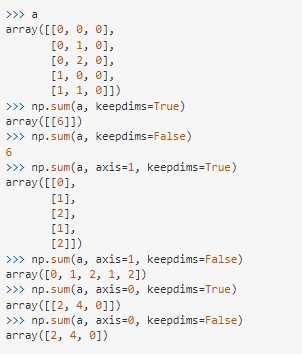

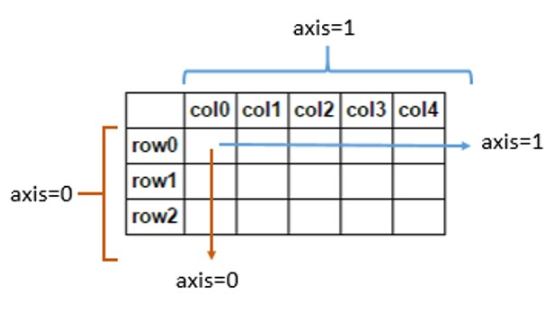

Link for the video:
[xorneural_adarshmenon](https://www.youtube.com/watch?v=HNwcN3RHcNI&t=0s)